In [3]:
import pandas as pd

df1 = pd.read_csv('/content/IPL_Data.csv')
df2 = pd.read_csv('/content/deliveries.csv')
df3 = pd.read_csv('/content/matches.csv')

print("Datasets loaded successfully!")

Datasets loaded successfully!


In [4]:
print(" Dataset 1 (deliveries.csv) Info:")
df1.info()
print("\n Dataset 2 (IPL_data.csv) Info:")
df2.info()
print("\n Dataset 3 (matches.csv) Info:")
df3.info()

 Dataset 1 (deliveries.csv) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             237 non-null    object 
 1   Team             237 non-null    object 
 2   Url              237 non-null    object 
 3   Type             237 non-null    object 
 4   ValueinCR        237 non-null    float64
 5   Full Name        231 non-null    object 
 6   Born             231 non-null    object 
 7   Age              231 non-null    object 
 8   National Side    231 non-null    object 
 9   Batting Style    227 non-null    object 
 10  Bowling          206 non-null    object 
 11  Sport            126 non-null    object 
 12  MatchPlayed      162 non-null    float64
 13  InningsBatted    162 non-null    float64
 14  NotOuts          162 non-null    float64
 15  RunsScored       153 non-null    float64
 16  HighestInnScore  153 non-nul

In [5]:
df1.head()
df2.head()
df3.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
df3.drop(columns=["method"], inplace=True)

In [7]:
df3["result_margin"] = df3["result_margin"].fillna(df3["result_margin"].median())
df3["target_runs"] = df3["target_runs"].fillna(df3["target_runs"].median())
df3["target_overs"] = df3["target_overs"].fillna(df3["target_overs"].median())

In [8]:
categorical_cols = ["city", "player_of_match", "winner"]

for col in categorical_cols:
    df3[col] = df3[col].fillna("Unknown")

In [9]:
print("Duplicates in df1:", df1.duplicated().sum())
print("Duplicates in df2:", df2.duplicated().sum())
print("Duplicates in df3:", df3.duplicated().sum())

Duplicates in df1: 0
Duplicates in df2: 0
Duplicates in df3: 0


In [10]:
print("Data Types in df1:\n", df1.dtypes)
print("Data Types in df2:\n", df2.dtypes)
print("Data Types in df3:\n", df3.dtypes)

Data Types in df1:
 Name                object
Team                object
Url                 object
Type                object
ValueinCR          float64
Full Name           object
Born                object
Age                 object
National Side       object
Batting Style       object
Bowling             object
Sport               object
MatchPlayed        float64
InningsBatted      float64
NotOuts            float64
RunsScored         float64
HighestInnScore     object
100s               float64
50s                float64
4s                 float64
6s                 float64
BattingAVG         float64
BattingS/R         float64
CatchesTaken       float64
StumpingsMade      float64
Ducks              float64
R/O                float64
InningsBowled      float64
Overs              float64
Maidens            float64
RunsConceded       float64
Wickets            float64
Best                object
3s                 float64
5s                 float64
BowlingAVG         float64
EconomyR

In [11]:
df1['Age'] = pd.to_numeric(df1['Age'], errors='coerce')

df2['is_wicket'] = pd.to_numeric(df2['is_wicket'], errors='coerce')

df3['result_margin'] = pd.to_numeric(df3['result_margin'], errors='coerce')
df3['target_runs'] = pd.to_numeric(df3['target_runs'], errors='coerce')
df3['target_overs'] = pd.to_numeric(df3['target_overs'], errors='coerce')

df3['date'] = pd.to_datetime(df3['date'], errors='coerce')

In [12]:
df1.describe()
df2.describe()
df3.describe()

,id,date,result_margin,target_runs,target_overs
count,1.095000e+03,1095,1095.000000,1095.000000,1095.000000
mean,9.048283e+05,2016-06-25 11:39:36.986301184,17.098630,165.684932,19.760000
min,3.359820e+05,2008-04-18 00:00:00,1.000000,43.000000,5.000000
25%,5.483315e+05,2012-04-21 00:00:00,6.000000,146.000000,20.000000
50%,9.809610e+05,2016-05-03 00:00:00,8.000000,166.000000,20.000000
75%,1.254062e+06,2021-04-13 12:00:00,19.000000,187.000000,20.000000
max,1.426312e+06,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.677402e+05,NaN,21.631266,33.381189,1.578989


In [13]:
for col in df3.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df3[col].value_counts())


Unique values in season:
season
2013       76
2023       74
2012       74
2022       74
2011       73
2024       71
2018       60
2021       60
2020/21    60
2019       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

Unique values in city:
city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Unknown            51
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Raipur              6
Mohali              5
Kochi         

VISUALIZATION

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [15]:
print("Deliveries Dataset Info:")
df2.info()

df2.head()

Deliveries Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92042 entries, 0 to 92041
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          92042 non-null  int64  
 1   inning            92042 non-null  int64  
 2   batting_team      92042 non-null  object 
 3   bowling_team      92042 non-null  object 
 4   over              92042 non-null  int64  
 5   ball              92042 non-null  int64  
 6   batter            92042 non-null  object 
 7   bowler            92042 non-null  object 
 8   non_striker       92041 non-null  object 
 9   batsman_runs      92041 non-null  float64
 10  extra_runs        92041 non-null  float64
 11  total_runs        92041 non-null  float64
 12  extras_type       5096 non-null   object 
 13  is_wicket         92041 non-null  float64
 14  player_dismissed  4552 non-null   object 
 15  dismissal_kind    4552 non-null   object 
 16  fielder        

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


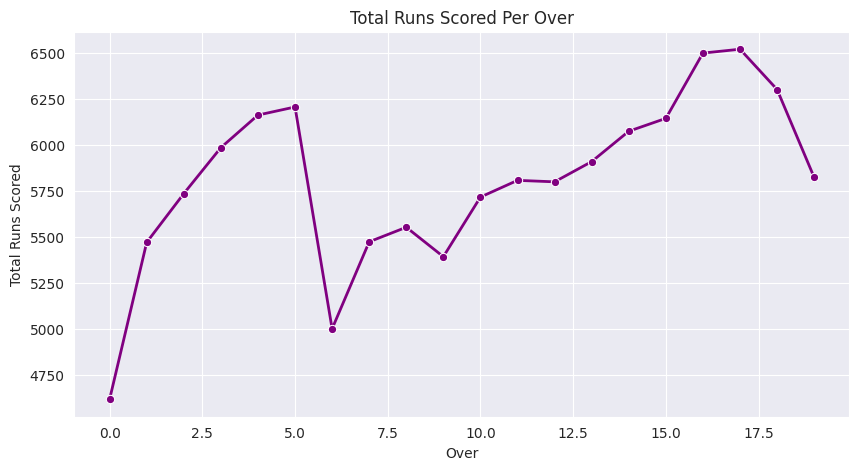

In [39]:
runs_per_over = df2.groupby("over")["total_runs"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker="o", color="purple", linewidth=2)
plt.xlabel("Over")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored Per Over")
plt.grid(True)
plt.show()

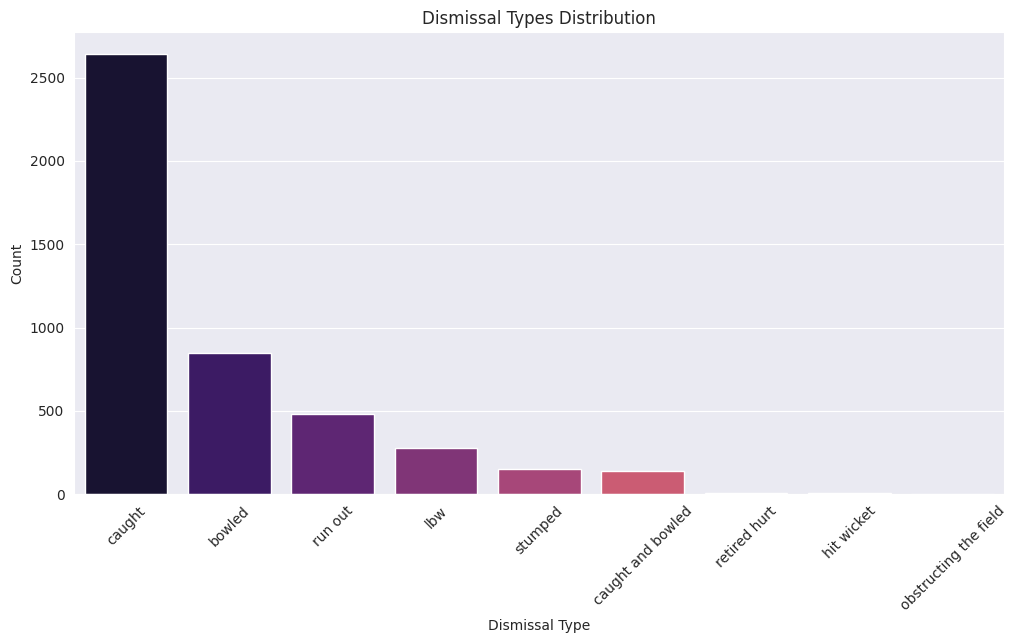

In [27]:
dismissal_counts = df2["dismissal_kind"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, hue=dismissal_counts.index, palette="magma", legend=False)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Dismissal Types Distribution")
plt.xticks(rotation=45)
plt.show()

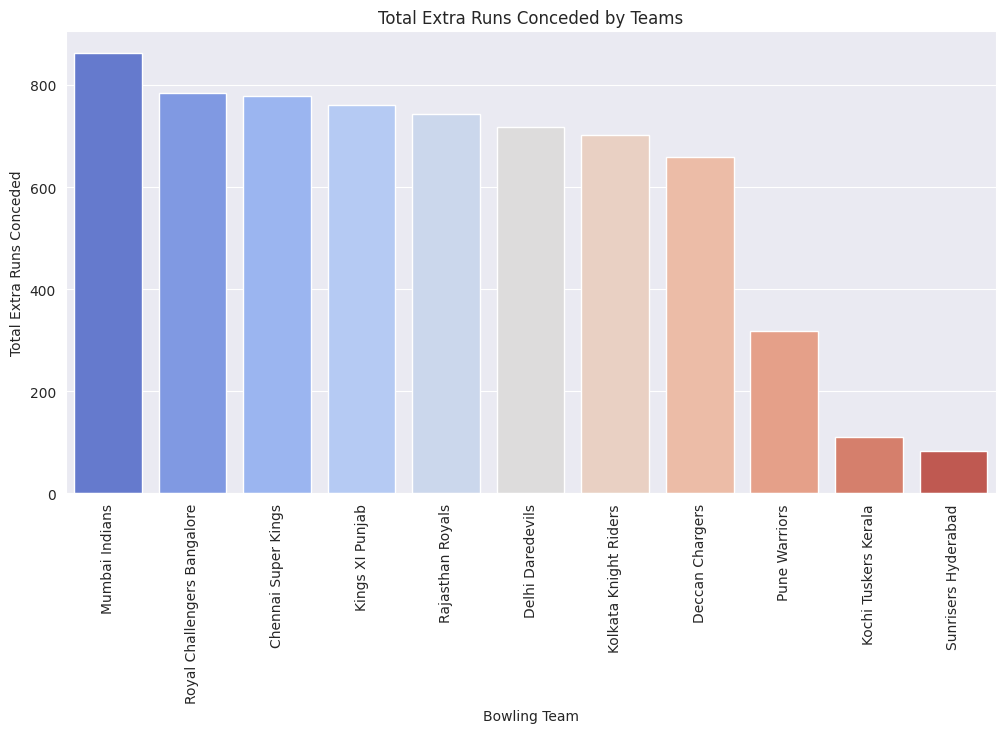

In [28]:
extra_runs = df2.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=extra_runs.index, y=extra_runs.values, hue=extra_runs.index, palette="coolwarm", legend=False)
plt.xlabel("Bowling Team")
plt.ylabel("Total Extra Runs Conceded")
plt.title("Total Extra Runs Conceded by Teams")
plt.xticks(rotation=90)
plt.show()

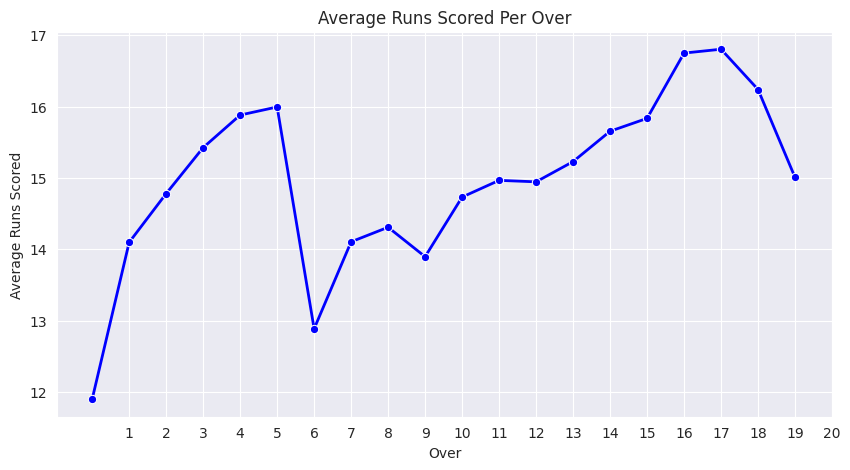

In [40]:
runs_per_over = df2.groupby("over")["total_runs"].sum()

total_matches = df2["match_id"].nunique()
avg_runs_per_over = runs_per_over / total_matches

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_runs_per_over.index, y=avg_runs_per_over.values, marker="o", color="blue", linewidth=2)
plt.xlabel("Over")
plt.ylabel("Average Runs Scored")
plt.title("Average Runs Scored Per Over")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


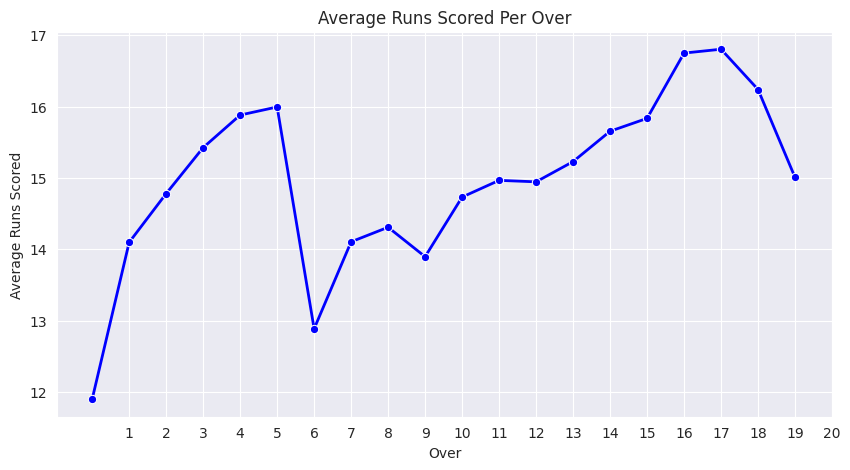

In [41]:
runs_per_over = df2.groupby("over")["total_runs"].sum()

total_matches = df2["match_id"].nunique()
avg_runs_per_over = runs_per_over / total_matches

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_runs_per_over.index, y=avg_runs_per_over.values, marker="o", color="blue", linewidth=2)
plt.xlabel("Over")
plt.ylabel("Average Runs Scored")
plt.title("Average Runs Scored Per Over")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

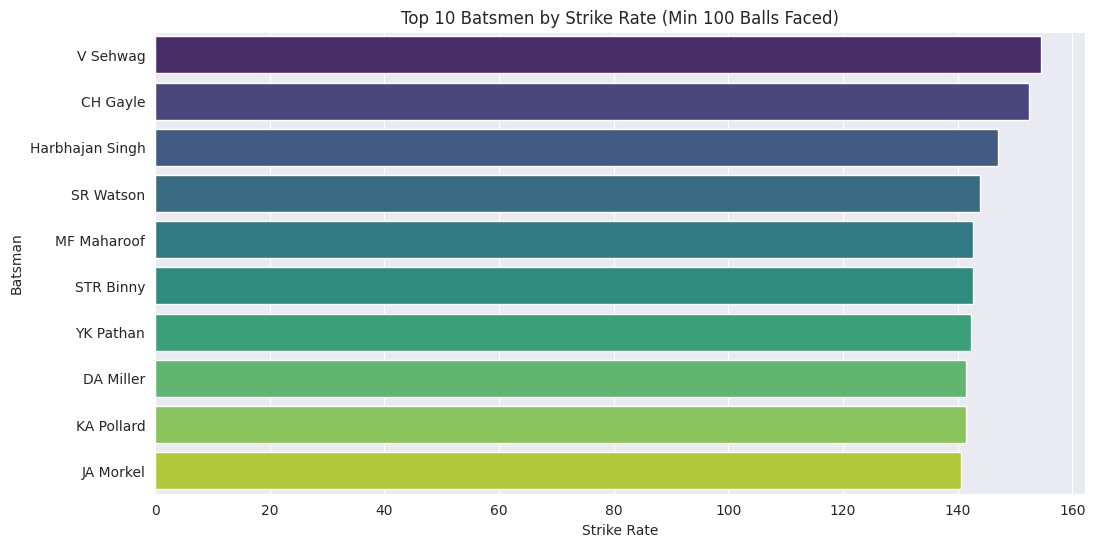

In [31]:
batsman_stats = df2.groupby("batter").agg(total_runs=("batsman_runs", "sum"),
                                           balls_faced=("ball", "count")).reset_index()

batsman_stats["strike_rate"] = (batsman_stats["total_runs"] / batsman_stats["balls_faced"]) * 100

top_batsmen = batsman_stats[batsman_stats["balls_faced"] >= 100].nlargest(10, "strike_rate")

plt.figure(figsize=(12, 6))
sns.barplot(x="strike_rate", y="batter", data=top_batsmen, hue="batter", palette="viridis", legend=False)
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.title("Top 10 Batsmen by Strike Rate (Min 100 Balls Faced)")
plt.show()


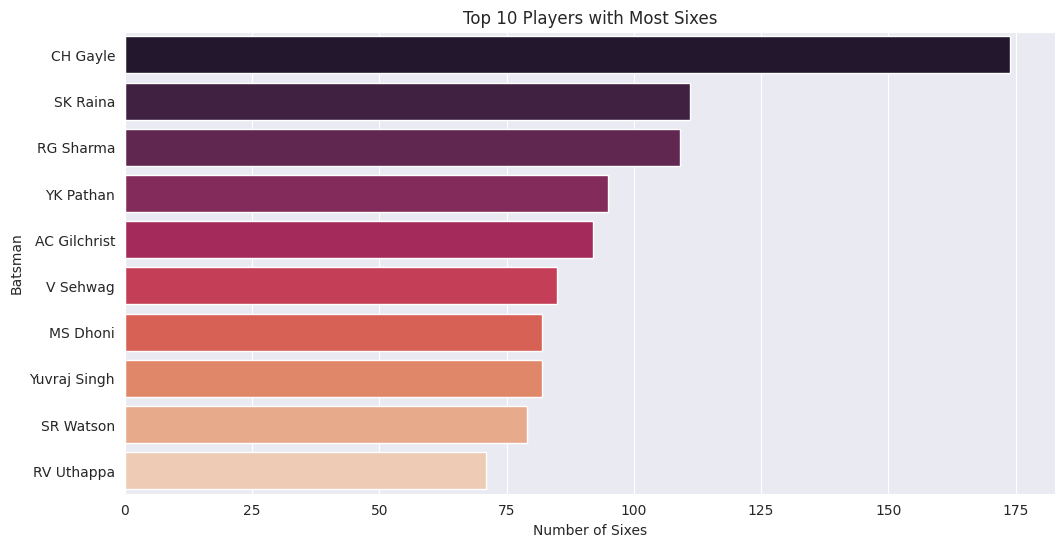

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sixes = df2[df2["batsman_runs"] == 6]

sixes_count = sixes["batter"].value_counts().nlargest(10).reset_index()
sixes_count.columns = ["batter", "sixes"]

plt.figure(figsize=(12, 6))
sns.barplot(x="sixes", y="batter", data=sixes_count, hue="batter", palette="rocket", legend=False)
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.title("Top 10 Players with Most Sixes")
plt.show()

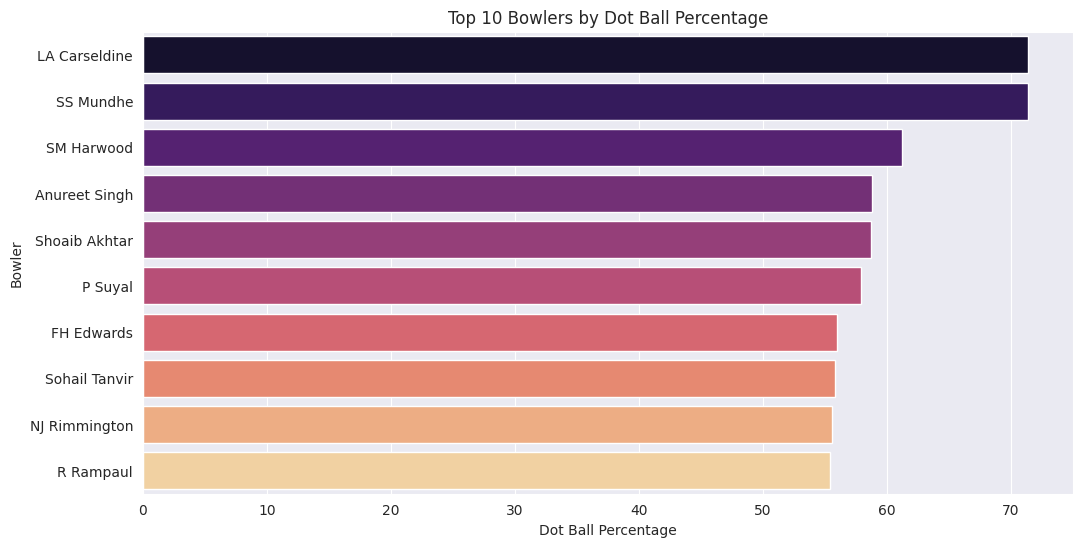

In [33]:
total_balls = df2.groupby("bowler")["ball"].count()

dot_balls = df2[df2["batsman_runs"] == 0].groupby("bowler")["ball"].count()

dot_ball_percentage = (dot_balls / total_balls) * 100
dot_ball_percentage = dot_ball_percentage.dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=dot_ball_percentage.values, y=dot_ball_percentage.index, hue=dot_ball_percentage.index, palette="magma", legend=False)
plt.xlabel("Dot Ball Percentage")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers by Dot Ball Percentage")
plt.show()


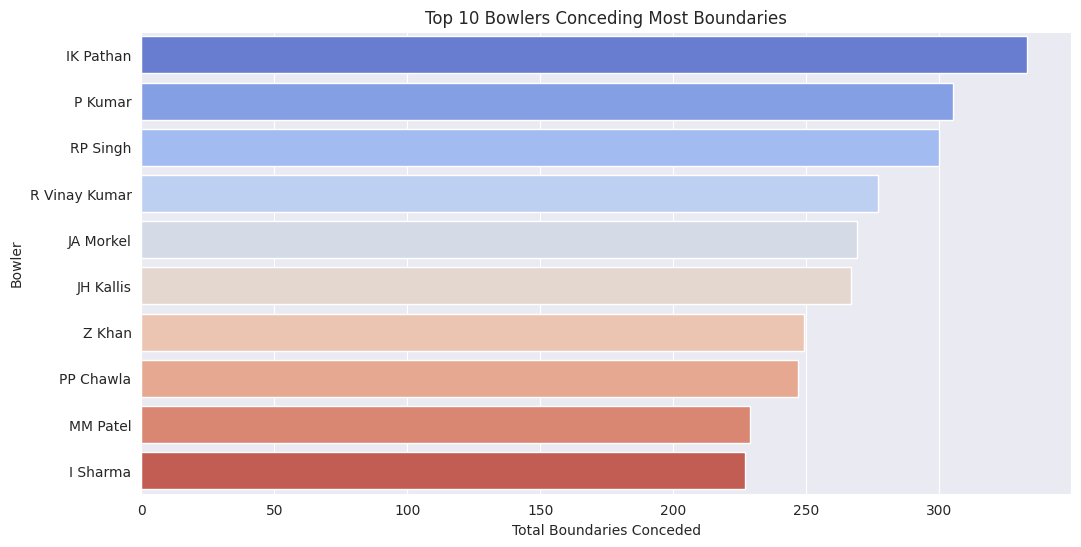

In [34]:
boundaries_conceded = df2[df2["batsman_runs"].isin([4, 6])].groupby("bowler")["batsman_runs"].count()
top_boundary_conceding_bowlers = boundaries_conceded.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_boundary_conceding_bowlers.values, y=top_boundary_conceding_bowlers.index, hue=top_boundary_conceding_bowlers.index, palette="coolwarm", legend=False)
plt.xlabel("Total Boundaries Conceded")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers Conceding Most Boundaries")
plt.show()

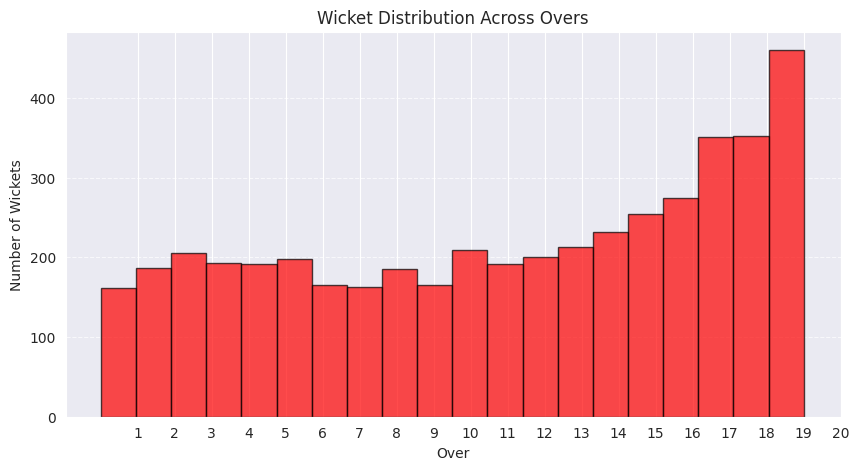

In [42]:
plt.figure(figsize=(10, 5))
plt.hist(df2[df2["is_wicket"] == 1]["over"], bins=20, color="red", edgecolor="black", alpha=0.7)
plt.xlabel("Over")
plt.ylabel("Number of Wickets")
plt.title("Wicket Distribution Across Overs")
plt.xticks(range(1, 21))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


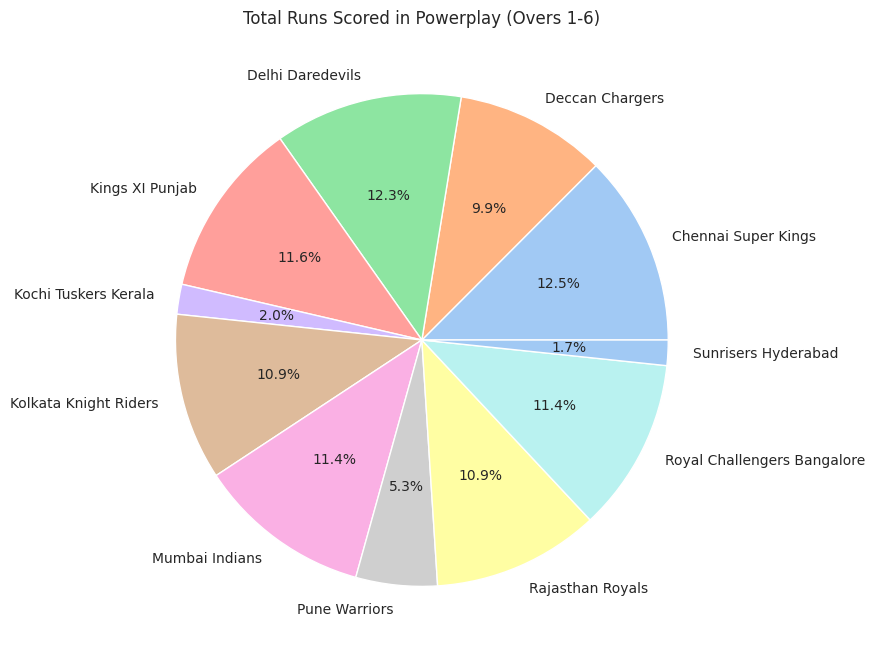

In [43]:
powerplay_runs = df2[df2["over"] <= 6].groupby("batting_team")["total_runs"].sum()
plt.figure(figsize=(8, 8))
plt.pie(powerplay_runs, labels=powerplay_runs.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Total Runs Scored in Powerplay (Overs 1-6)")
plt.show()


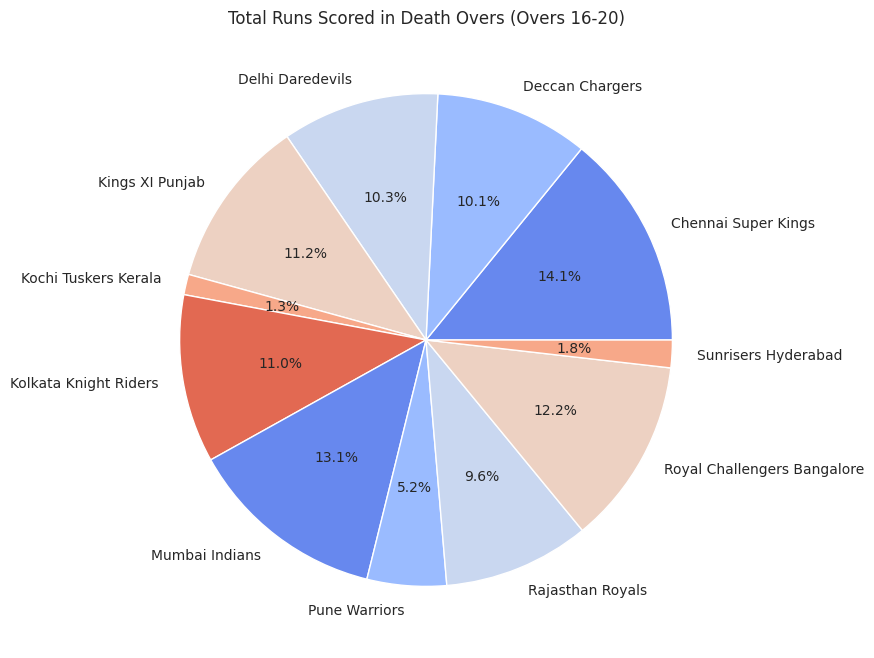

In [44]:
death_over_runs = df2[df2["over"] >= 16].groupby("batting_team")["total_runs"].sum()
plt.figure(figsize=(8, 8))
plt.pie(death_over_runs, labels=death_over_runs.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm"))
plt.title("Total Runs Scored in Death Overs (Overs 16-20)")
plt.show()


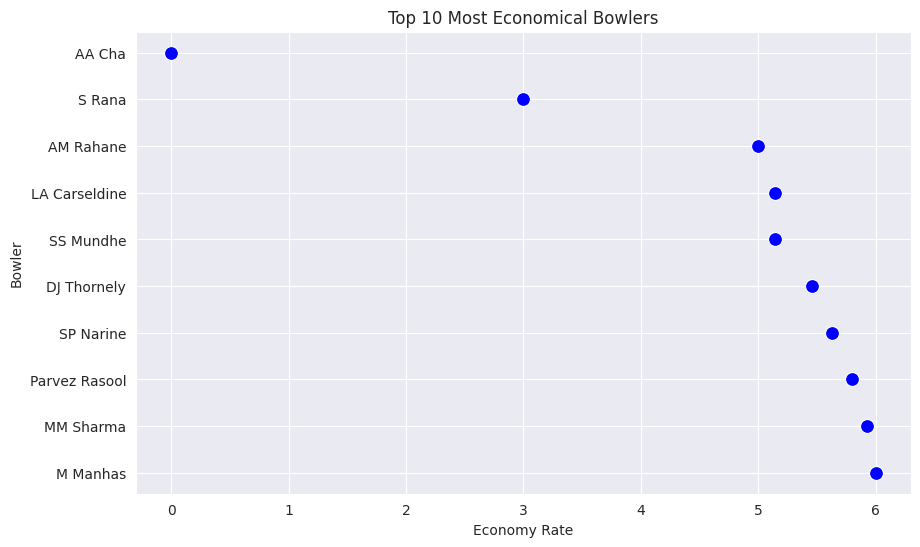

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="economy_rate", y="bowler", data=top_economical_bowlers, color="blue", s=100)
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.title("Top 10 Most Economical Bowlers")
plt.grid(True)
plt.show()